<a href="https://colab.research.google.com/github/ranesh88/Credit_card_fraud_detection/blob/master/Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

In [ ]:
!ls '/content/drive/'

In [ ]:
import pandas as pd
data=pd.read_csv('/content/drive/My Drive/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Collection of Libraries

In [ ]:
import numpy as np
import sklearn
import scipy
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score,accuracy_score
from sklearn.metrics import cohen_kappa_score
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")

In [ ]:
data.shape

(284807, 31)

In [ ]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
data.isnull().sum().any()

False

Text(0, 0.5, 'Frequency')

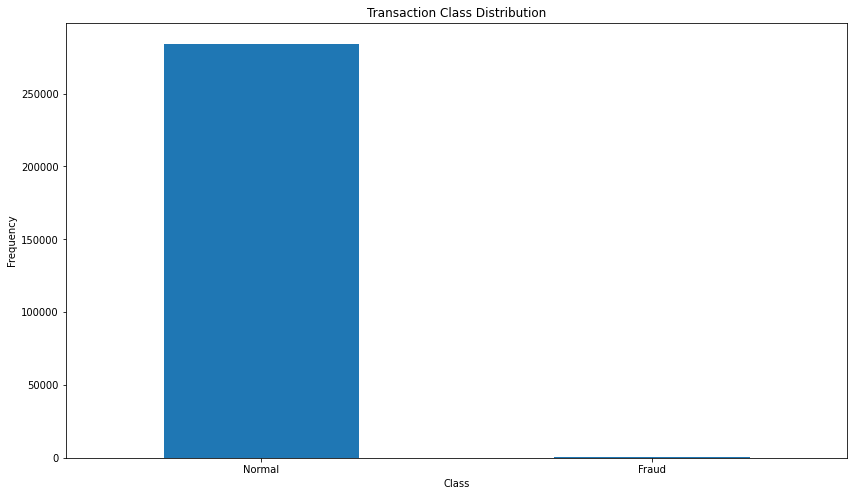

In [ ]:
count_classes = pd.value_counts(data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [ ]:
## Get the Fraud and the normal dataset 

fraud = data[data['Class']==1]

normal = data[data['Class']==0]

In [ ]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [ ]:
## We need to analysis more amount of information from transaction data
## How different are the amount of money used in different transaction classes...
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

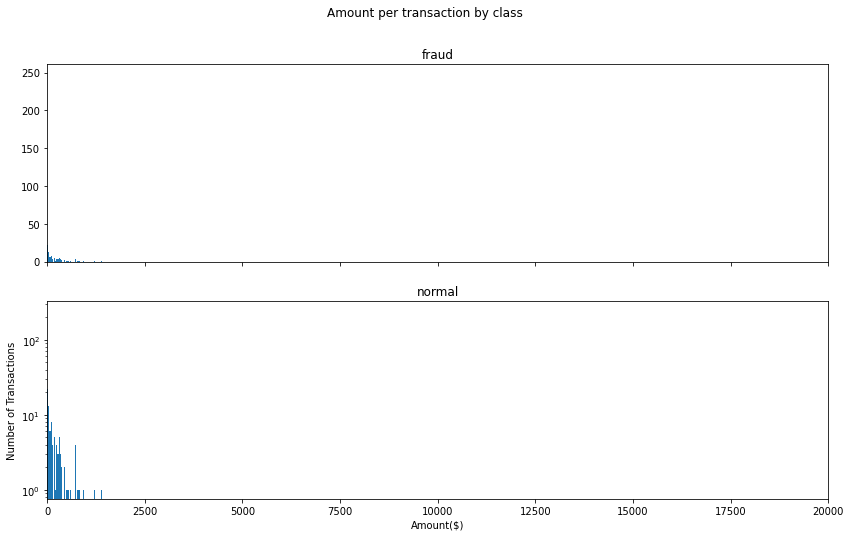

In [ ]:
f,(ax1,ax2)=plt.subplots(2,1,sharex=True)
f.suptitle("Amount per transaction by class")
bins=200
ax1.hist(fraud.Amount,bins=bins)
ax1.set_title("fraud")
ax2.hist(fraud.Amount,bins=bins)
ax2.set_title("normal")
plt.xlabel("Amount($)")
plt.ylabel("Number of Transactions")
plt.xlim((0,20000))
plt.yscale("log")
plt.show();

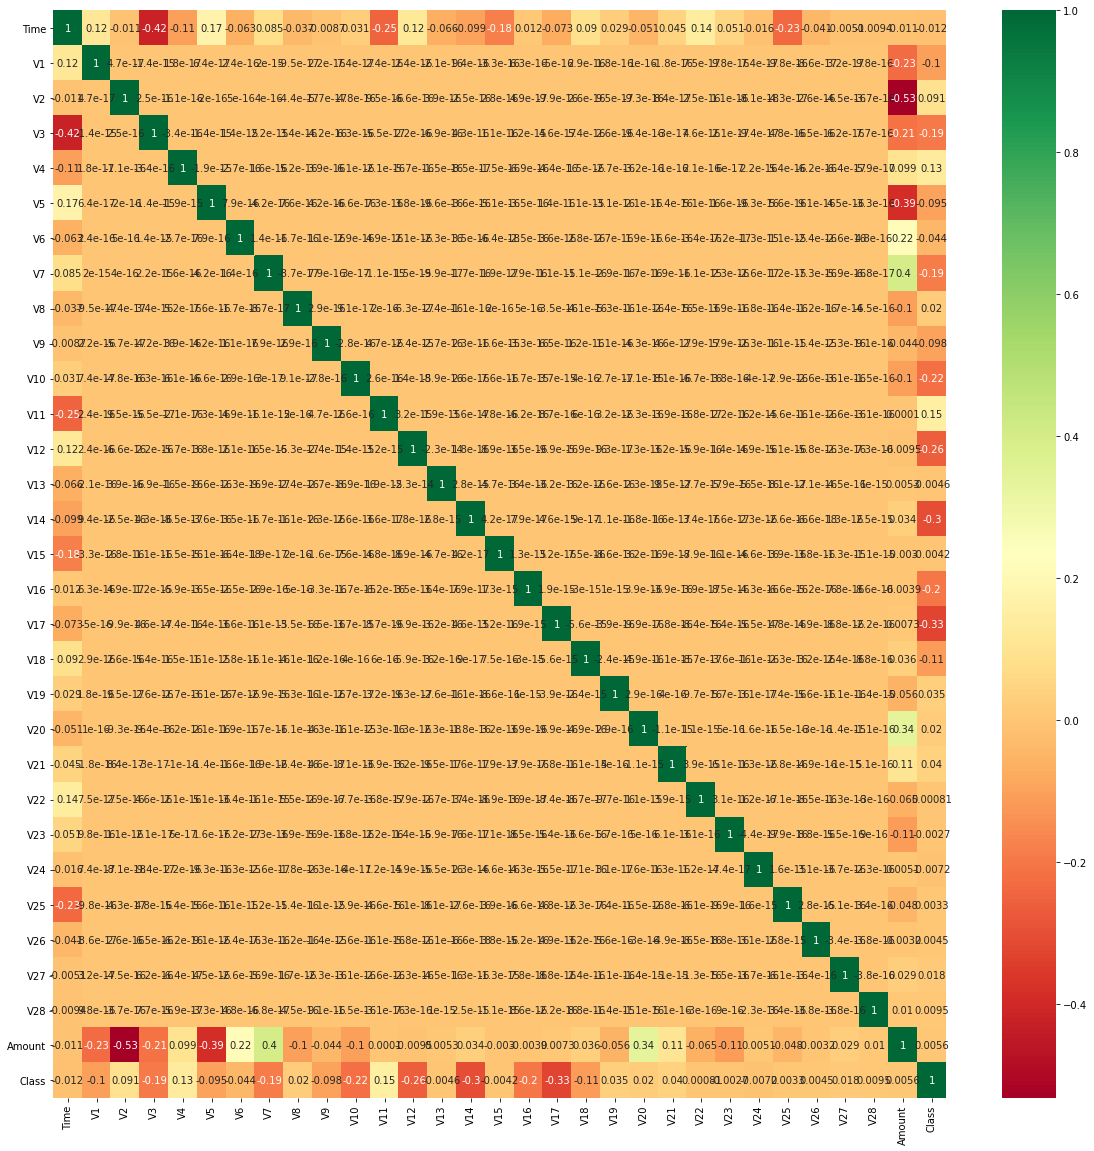

In [ ]:
## Correltion
## get correlation of each features in the dataset
cormat=data.corr()
top_corr_features=cormat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

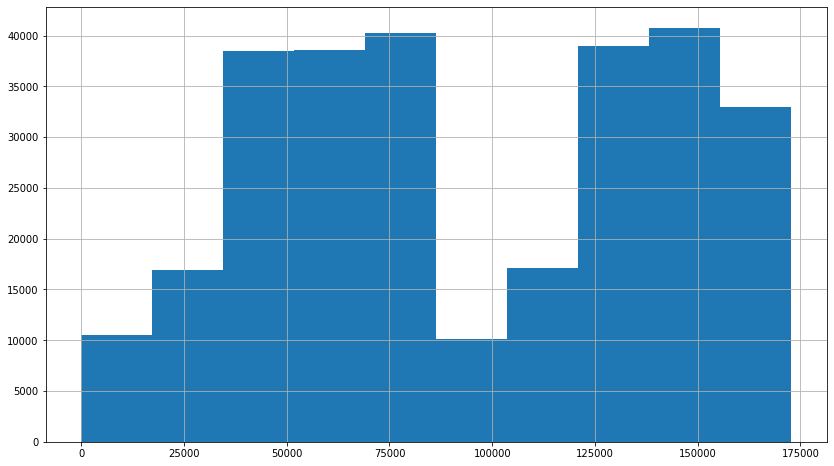

In [ ]:
data.Time.hist()

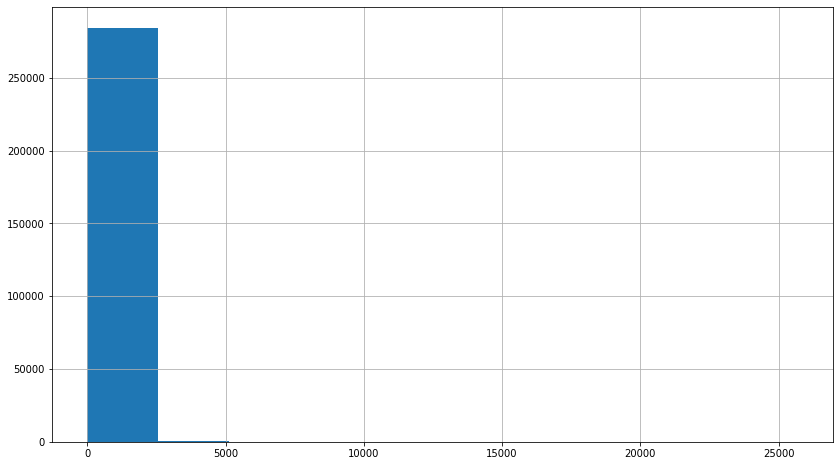

In [ ]:
data.Amount.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7683d09f98>,
      dtype=object)

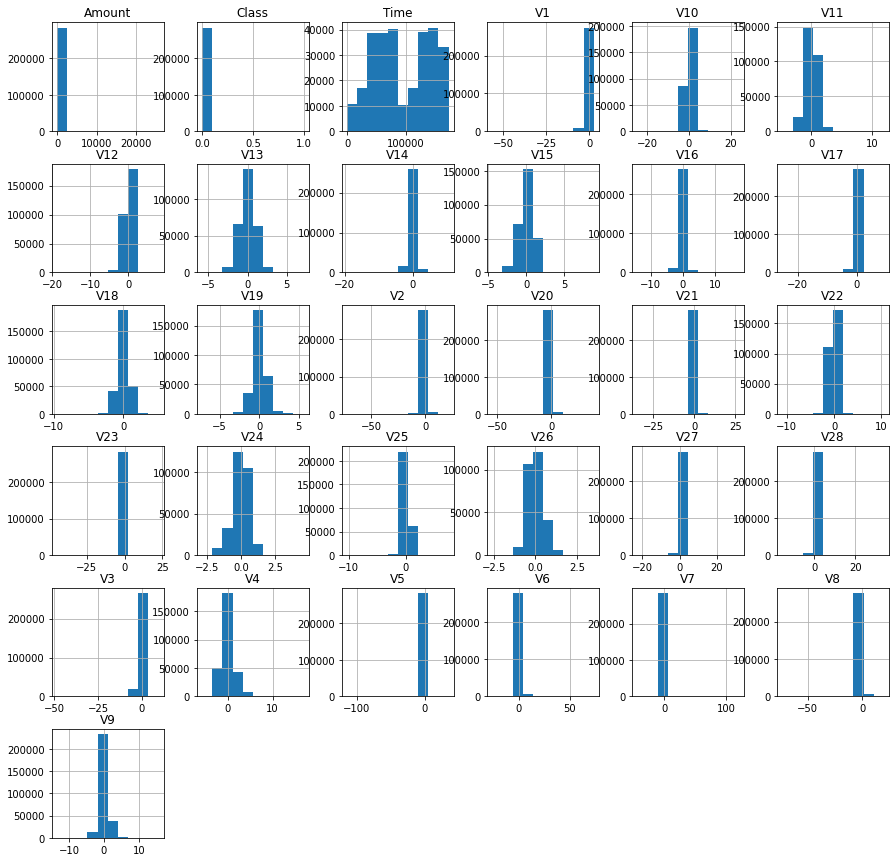

In [ ]:
data.hist(figsize=(15,15))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [ ]:
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

In [ ]:

def generate_model_report(Y_test, y_pred):
    print("Accuracy = " , accuracy_score(Y_test, y_pred))
    print("Precision = " ,precision_score(Y_test, y_pred))
    print("Recall = " ,recall_score(Y_test, y_pred))
    print("F1 Score = " ,f1_score(Y_test, y_pred))
    print("Kappa Score = ",cohen_kappa_score(Y_test,y_pred))
    pass

In [ ]:
log_class=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [ ]:
#Create independent and Dependent Features
columns = data.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "Class"
# Define a random state 
state = np.random.RandomState(42)
X = data[columns]
Y = data[target]
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.7)

In [ ]:
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train,Y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

In [ ]:
y_pred=clf.predict(X_test)
print(confusion_matrix(Y_test,y_pred))
print(accuracy_score(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

[[85239    44]
 [   66    94]]
0.9987125920204113
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85283
           1       0.68      0.59      0.63       160

    accuracy                           1.00     85443
   macro avg       0.84      0.79      0.82     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
pd.crosstab(pd.Series(y_pred, name = 'Predicted'), 
            pd.Series(Y_test, name = 'Actual'))

Actual,0,1
Predicted,,
0,25788,68
1,33,0


In [ ]:
generate_model_report(Y_test,y_pred)

Accuracy =  0.9987125920204113
Precision =  0.6811594202898551
Recall =  0.5875
F1 Score =  0.6308724832214765
Kappa Score =  0.6302311752990635


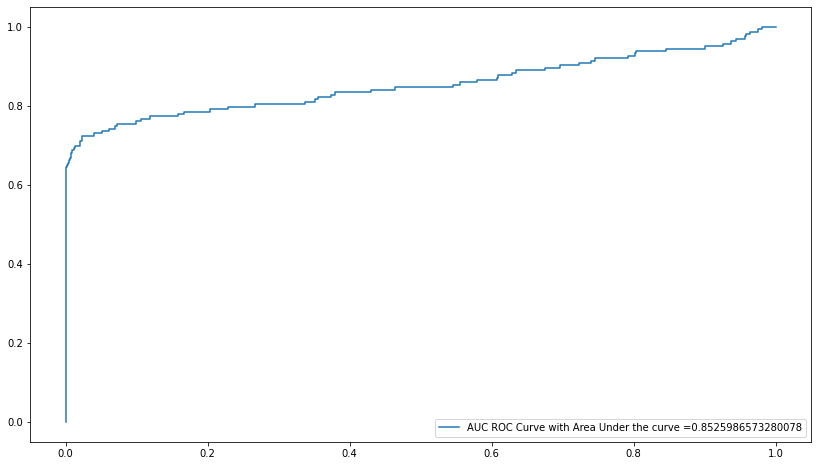

In [ ]:
generate_auc_roc_curve(clf, X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(Y_test,y_pred))
print(accuracy_score(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

[[85278     5]
 [   43   117]]
0.9994382219725431
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85283
           1       0.96      0.73      0.83       160

    accuracy                           1.00     85443
   macro avg       0.98      0.87      0.91     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
pd.crosstab(pd.Series(y_pred, name = 'Predicted'), 
            pd.Series(Y_test, name = 'Actual'))

Actual,0,1
Predicted,,
0,25444,51
1,36,0


In [ ]:
generate_model_report(Y_test,y_pred)

Accuracy =  0.9994382219725431
Precision =  0.9590163934426229
Recall =  0.73125
F1 Score =  0.8297872340425532
Kappa Score =  0.8295109978489257


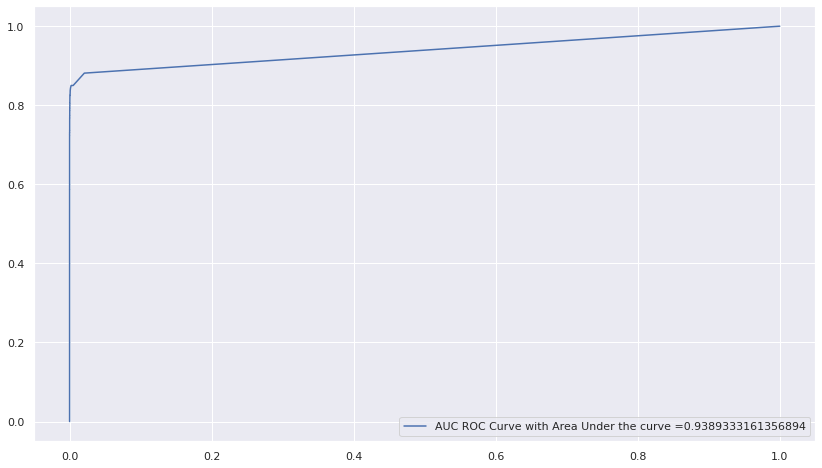

In [ ]:
generate_auc_roc_curve(classifier, X_test)

In [ ]:
from xgboost import XGBClassifier
classifier_xgb=XGBClassifier()
classifier_xgb.fit(X_train,Y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred=classifier_xgb.predict(X_test)
print(confusion_matrix(Y_test,y_pred))
print(accuracy_score(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

[[85271    12]
 [   46   114]]
0.9993211848834895
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85283
           1       0.90      0.71      0.80       160

    accuracy                           1.00     85443
   macro avg       0.95      0.86      0.90     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
pd.crosstab(pd.Series(y_pred, name = 'Predicted'), 
            pd.Series(Y_test, name = 'Actual'))

Actual,0,1
Predicted,,
0,25443,51
1,37,0


In [ ]:
generate_model_report(Y_test,y_pred)

Accuracy =  0.9993211848834895
Precision =  0.9047619047619048
Recall =  0.7125
F1 Score =  0.7972027972027972
Kappa Score =  0.7968676333839392


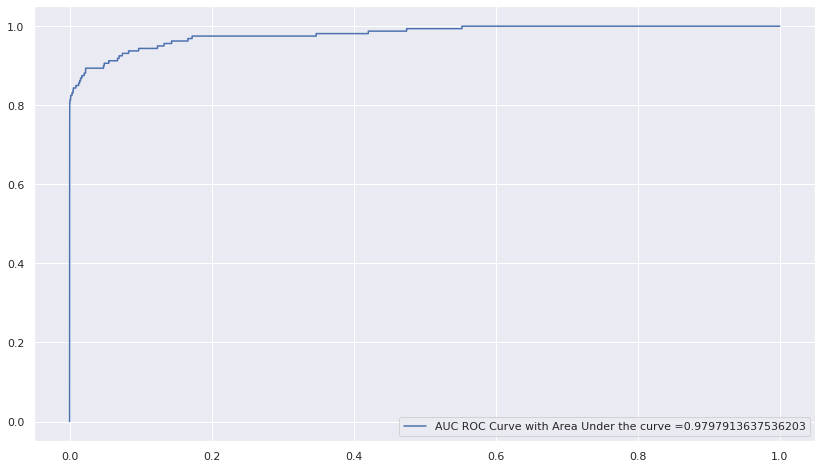

In [ ]:
generate_auc_roc_curve(classifier_xgb, X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn=KNeighborsClassifier(n_neighbors=13)
clf_knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [ ]:
y_pred=clf_knn.predict(X_test)
print(confusion_matrix(Y_test,y_pred))
print(accuracy_score(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

[[85283     0]
 [  157     3]]
0.9981625177018597
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85283
           1       1.00      0.02      0.04       160

    accuracy                           1.00     85443
   macro avg       1.00      0.51      0.52     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
generate_model_report(Y_test,y_pred)

Accuracy =  0.9981625177018597
Precision =  1.0
Recall =  0.01875
F1 Score =  0.03680981595092024
Kappa Score =  0.036743418848822706


In [ ]:
from sklearn.svm import SVC
##clf_lnr=SVC(kernel='linear')
##clf_lnr.fit(X_train,Y_train)


In [ ]:
y_pred=clf_lnr.predict(X_test)
print(confusion_matrix(Y_test,y_pred))
print(accuracy_score(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

In [ ]:
clf_ply=SVC(kernel='poly')
clf_ply.fit(X_train,Y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred=clf_ply.predict(X_test)
print(confusion_matrix(Y_test,y_pred))
print(accuracy_score(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

[[85293     0]
 [  150     0]]
0.9982444436641972
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85293
           1       0.00      0.00      0.00       150

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
clf_rbf=SVC(kernel='rbf')
clf_rbf.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred=clf_rbf.predict(X_test)
print(confusion_matrix(Y_test,y_pred))
print(accuracy_score(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

[[85293     0]
 [  150     0]]
0.9982444436641972
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85293
           1       0.00      0.00      0.00       150

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dt=DecisionTreeClassifier(min_samples_leaf=90)
dt.fit(X_train,Y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=90, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred=dt.predict(X_test)
print(confusion_matrix(Y_test,y_pred))
print(accuracy_score(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

[[85282    11]
 [   75    75]]
0.9989934810341398
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85293
           1       0.87      0.50      0.64       150

    accuracy                           1.00     85443
   macro avg       0.94      0.75      0.82     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
Y_train.value_counts()

0    199022
1       342
Name: Class, dtype: int64

In [ ]:
from collections import Counter
from imblearn.under_sampling import NearMiss
ns=NearMiss(0.8)
X_train_ns,Y_train_ns=ns.fit_sample(X_train,Y_train)
print("The number of classes before fit {}".format(Counter(Y_train)))
print("The number of classes after fit {}".format(Counter(Y_train_ns)))


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


The number of classes before fit Counter({0: 199022, 1: 342})
The number of classes after fit Counter({0: 427, 1: 342})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,Y_train_ns)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(Y_test,y_pred))
print(accuracy_score(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

[[60714 24579]
 [   10   140]]
0.712217501726297
              precision    recall  f1-score   support

           0       1.00      0.71      0.83     85293
           1       0.01      0.93      0.01       150

    accuracy                           0.71     85443
   macro avg       0.50      0.82      0.42     85443
weighted avg       1.00      0.71      0.83     85443



In [ ]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(0.75)
X_train_ns,Y_train_ns=os.fit_sample(X_train,Y_train)
print("The number of classes before fit {}".format(Counter(Y_train)))
print("The number of classes after fit {}".format(Counter(Y_train_ns)))

The number of classes before fit Counter({0: 199022, 1: 342})
The number of classes after fit Counter({0: 199022, 1: 149266})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,Y_train_ns)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(Y_test,y_pred))
print(accuracy_score(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

[[85286     7]
 [   35   115]]
0.9995084442259752
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85293
           1       0.94      0.77      0.85       150

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
from imblearn.combine import SMOTETomek
os=SMOTETomek(0.5)
X_train_ns,Y_train_ns=os.fit_sample(X_train,Y_train)
print("The number of classes before fit {}".format(Counter(Y_train)))
print("The number of classes after fit {}".format(Counter(Y_train_ns)))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


The number of classes before fit Counter({0: 199022, 1: 342})
The number of classes after fit Counter({0: 198280, 1: 98769})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,Y_train_ns)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(Y_test,y_pred))
print(accuracy_score(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

[[85279    14]
 [   31   119]]
0.9994733330992591
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85293
           1       0.89      0.79      0.84       150

    accuracy                           1.00     85443
   macro avg       0.95      0.90      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
from imblearn.ensemble import EasyEnsembleClassifier
easy=EasyEnsembleClassifier()
easy.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

EasyEnsembleClassifier(base_estimator=None, n_estimators=10, n_jobs=1,
                       random_state=None, replacement=False,
                       sampling_strategy='auto', verbose=0, warm_start=False)

In [ ]:
y_pred=easy.predict(X_test)
print(confusion_matrix(Y_test,y_pred))
print(accuracy_score(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

[[82593  2700]
 [   14   136]]
0.9682361340308744
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85293
           1       0.05      0.91      0.09       150

    accuracy                           0.97     85443
   macro avg       0.52      0.94      0.54     85443
weighted avg       1.00      0.97      0.98     85443



In [ ]:
pip install pycaret

     |████████████████████████████████| 256kB 4.5MB/s 
     |████████████████████████████████| 6.8MB 10.9MB/s 
     |████████████████████████████████| 12.4MB 225kB/s 
     |████████████████████████████████| 266kB 20.2MB/s 
     |████████████████████████████████| 1.2MB 29.0MB/s 
     |████████████████████████████████| 61kB 8.7MB/s 
     |████████████████████████████████| 65.9MB 42kB/s 
     |████████████████████████████████| 1.6MB 42.9MB/s 
     |████████████████████████████████| 266kB 58.1MB/s 
     |████████████████████████████████| 102kB 14.6MB/s 
     |████████████████████████████████| 327kB 54.4MB/s 
     |████████████████████████████████| 153kB 40.9MB/s 
     |████████████████████████████████| 6.0MB 55.8MB/s 
     |████████████████████████████████| 51kB 8.2MB/s 
     |████████████████████████████████| 81kB 11.5MB/s 
     |████████████████████████████████| 1.1MB 56.2MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel met

In [ ]:
from pycaret.classification import *
clf1=setup(data=data ,target='Class')

Setup Succesfully Completed!


,Description,Value
0,session_id,309
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(284807, 31)"
4,Missing Values,False
5,Numeric Features,30
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
top3 = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Extreme Gradient Boosting,0.9996,0.9813,0.7905,0.9559,0.8645,0.8643,0.8686,29.0295
1,CatBoost Classifier,0.9996,0.9794,0.7877,0.9619,0.8656,0.8654,0.8700,61.9962
2,Random Forest Classifier,0.9995,0.9211,0.7558,0.9554,0.8422,0.8420,0.8487,9.3135
3,Extra Trees Classifier,0.9995,0.9459,0.7762,0.9552,0.8554,0.8552,0.8603,8.7829
4,Linear Discriminant Analysis,0.9994,0.9803,0.7644,0.8912,0.8205,0.8202,0.8238,0.7677
5,Ada Boost Classifier,0.9992,0.9705,0.7096,0.8295,0.7601,0.7597,0.7644,45.8392
6,Decision Tree Classifier,0.9991,0.8748,0.7500,0.7376,0.7432,0.7427,0.7430,12.5398
7,Logistic Regression,0.9990,0.9088,0.6860,0.7453,0.7100,0.7095,0.7123,3.3855
8,Gradient Boosting Classifier,0.9990,0.6120,0.4673,0.8707,0.5920,0.5916,0.6273,243.9936
9,Ridge Classifier,0.9989,0.0000,0.4215,0.8698,0.5608,0.5604,0.6006,0.1210


In [ ]:
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9995,0.9454,0.7429,1.0000,0.8525,0.8522,0.8617
1,0.9998,1.0000,0.9429,0.9706,0.9565,0.9564,0.9565
2,0.9996,0.9970,0.8857,0.9118,0.8986,0.8984,0.8985
3,0.9994,0.9731,0.7429,0.9286,0.8254,0.8251,0.8303
4,0.9995,0.9501,0.7647,0.9286,0.8387,0.8385,0.8424
5,0.9995,0.9546,0.7353,0.9615,0.8333,0.8331,0.8406
6,0.9997,0.9829,0.8235,1.0000,0.9032,0.9031,0.9073
7,0.9997,0.9914,0.8824,0.9677,0.9231,0.9230,0.9239
8,0.9996,0.9980,0.8529,0.9355,0.8923,0.8921,0.8931
9,0.9995,0.9253,0.7353,0.9615,0.8333,0.8331,0.8406


In [ ]:
tuned_catboost = tune_model(catboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9996,0.9873,0.7714,1.0000,0.8710,0.8708,0.8781
1,0.9996,0.9762,0.8286,0.9667,0.8923,0.8921,0.8948
2,0.9997,0.9782,0.8857,0.9394,0.9118,0.9116,0.9120
3,0.9995,0.9633,0.7714,0.9310,0.8438,0.8435,0.8472
4,0.9996,0.9975,0.7941,1.0000,0.8852,0.8851,0.8910
5,0.9996,0.9916,0.8235,0.9333,0.8750,0.8748,0.8765
6,0.9997,0.9835,0.8529,1.0000,0.9206,0.9205,0.9234
7,0.9993,0.9802,0.7059,0.8571,0.7742,0.7738,0.7775
8,0.9995,0.9758,0.7353,1.0000,0.8475,0.8472,0.8573
9,0.9996,0.9952,0.7941,0.9643,0.8710,0.8708,0.8749


In [ ]:
from catboost import CatBoostClassifier
cat=CatBoostClassifier()
cat.fit(X_train,Y_train)

Learning rate set to 0.098829
0:	learn: 0.3637795	total: 127ms	remaining: 2m 6s
1:	learn: 0.1968380	total: 205ms	remaining: 1m 42s
2:	learn: 0.1055782	total: 278ms	remaining: 1m 32s
3:	learn: 0.0588021	total: 349ms	remaining: 1m 26s
4:	learn: 0.0348034	total: 427ms	remaining: 1m 24s
5:	learn: 0.0221403	total: 494ms	remaining: 1m 21s
6:	learn: 0.0148589	total: 558ms	remaining: 1m 19s
7:	learn: 0.0103591	total: 637ms	remaining: 1m 19s
8:	learn: 0.0078168	total: 705ms	remaining: 1m 17s
9:	learn: 0.0061547	total: 773ms	remaining: 1m 16s
10:	learn: 0.0050153	total: 843ms	remaining: 1m 15s
11:	learn: 0.0043004	total: 912ms	remaining: 1m 15s
12:	learn: 0.0038036	total: 986ms	remaining: 1m 14s
13:	learn: 0.0034092	total: 1.06s	remaining: 1m 14s
14:	learn: 0.0031354	total: 1.13s	remaining: 1m 14s
15:	learn: 0.0029350	total: 1.2s	remaining: 1m 13s
16:	learn: 0.0027920	total: 1.27s	remaining: 1m 13s
17:	learn: 0.0026597	total: 1.36s	remaining: 1m 14s
18:	learn: 0.0025445	total: 1.43s	remaining: 1

In [ ]:
y_pred=cat.predict(X_test)
print(confusion_matrix(Y_test,y_pred))
print(accuracy_score(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

[[85279     4]
 [   41   119]]
0.9994733330992591
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85283
           1       0.97      0.74      0.84       160

    accuracy                           1.00     85443
   macro avg       0.98      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
pd.crosstab(pd.Series(y_pred, name = 'Predicted'), 
            pd.Series(Y_test, name = 'Actual'),
            margins=True)

Actual,0,1,All
Predicted,,,
0,25444,51,25495
1,36,0,36
All,25480,51,25531


In [ ]:
generate_model_report(Y_test,y_pred)

Accuracy =  0.9994733330992591
Precision =  0.967479674796748
Recall =  0.74375
F1 Score =  0.8409893992932862
Kappa Score =  0.8407301451235945


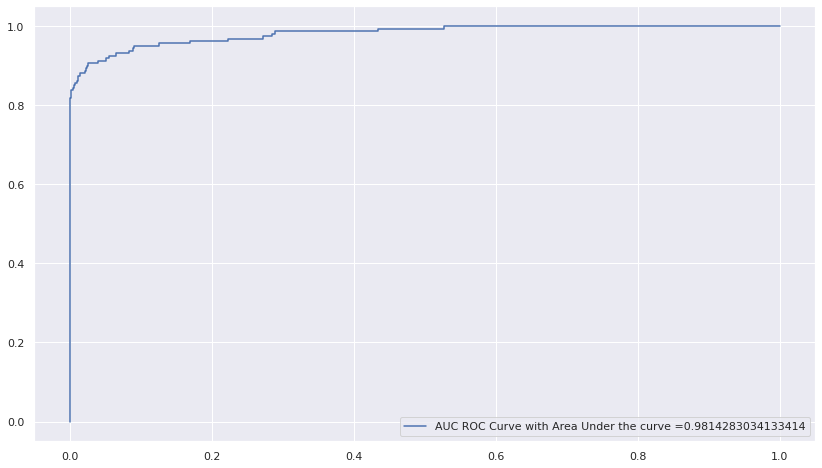

In [ ]:
generate_auc_roc_curve(cat, X_test)